<a href="https://colab.research.google.com/github/CaioPadoa/Projetos-DSNP-3.0/blob/main/%5BOK%5D_%5BTemplate%5D_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*

### Importando os dados do COVID-19

* Você deve entrar no site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.
    * Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este meu link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).
* *Importe os dados do `csv` para a variável `df`.*
    * *`pd.read_csv("endereco_do_arquivo.csv")`*

In [53]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv("/content/owid-covid-data.csv")

## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

...

...

### Análise Exploratória Inicial

* *Visualizar as 5 primeiras entradas*
    * `df.head()`
* *Qual o tamanho do seu DataFrame*
    * `df.shape`
* *Extrair e imprimir os nomes das colunas*
    * `df.columns`
* *Quais os tipos das variáveis*
    * `df.dtypes`
* *Identifique a porcentagem de valores ausentes das colunas*
    * `df.isnull().sum() / df.shape[0]` ou
    * `(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)` *para ordem decrescente.*
* *Transforme a coluna `date` no formato `datetime`*
    * `df.date = pd.to_datetime(df.date)`
* *Ver para a data mais atual, quais os países que têm mais casos e mortes. Veja o exemplo:*
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)`
    * `df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)`
* Plotar um gráfico de barras para os 5 países com mais mortes
    * `df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]`
    * `ax.bar('location', 'total_deaths', data=top5_total_deaths)`
* Plotar um gráfico de linhas para ver a evolução do total de casos de COVID-19 no mundo.
    * `df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()`
* [OPCIONAL] Plotar um gráfico de dispersão considerando `gdp_per_capita` (ou seja, o PIB dos países) pelo número total de mortos. Pegue a data mais recente apenas.
    * Lembre-se que não é nada conclusivo, pois envolve fatores como proporcão de testes, etc.


Vamos......

In [54]:
#visualizando primeiras linhas da base de dados
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [55]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
192794,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192795,ZWE,Africa,Zimbabwe,2022-06-06,253508.0,170.0,202.286,5513.0,3.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192796,ZWE,Africa,Zimbabwe,2022-06-07,253637.0,129.0,177.000,5515.0,2.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192797,ZWE,Africa,Zimbabwe,2022-06-08,253779.0,142.0,129.286,5515.0,0.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192798,ZWE,Africa,Zimbabwe,2022-06-09,253779.0,NaN,NaN,5515.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [56]:
#visualizando formato da base de dados
df.shape

(192799, 67)

In [57]:
#visualizando quais são as colunas da base de dados
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [58]:
#verificando tipos das variáveis
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [59]:
#"date" deve ser convertido para datetime
df.date = pd.to_datetime(df.date)

In [60]:
#verificando variáveis novamente, após a correção
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [61]:
#verificar valores nulos (missing values)
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

weekly_icu_admissions_per_million          0.967453
weekly_icu_admissions                      0.967453
excess_mortality_cumulative_per_million    0.965736
excess_mortality                           0.965736
excess_mortality_cumulative                0.965736
                                             ...   
total_cases                                0.039373
population                                 0.006074
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

In [62]:
#ver quais países têm maior número de casos
df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
189656,OWID_WRL,NaN,World,2020-06-14,7922639.0,131892.0,127944.714,456620.0,3659.0,4680.857,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
75628,OWID_HIC,NaN,High income,2020-06-14,4325522.0,38511.0,40881.143,303653.0,759.0,1335.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183460,OWID_UMC,NaN,Upper middle income,2020-06-14,2498668.0,55157.0,56166.857,119752.0,1989.0,2561.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127422,OWID_NAM,NaN,North America,2020-06-14,2411528.0,26044.0,28387.286,146400.0,671.0,1277.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55996,OWID_EUR,NaN,Europe,2020-06-14,2175239.0,14771.0,15730.429,180440.0,286.0,504.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70167,GUM,Oceania,Guam,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.07,NaN,NaN,NaN,NaN,NaN
109689,MHL,Oceania,Marshall Islands,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,82.502,2.700,73.70,0.704,NaN,NaN,NaN,NaN
129886,MNP,Oceania,Northern Mariana Islands,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,76.74,NaN,NaN,NaN,NaN,NaN
140917,PRI,North America,Puerto Rico,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.10,NaN,130.0,0.93,-1.82,45.964884


In [63]:
#ver quais países têm maior número de mortes
df.loc[df.date == '2020-06-14'].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
189656,OWID_WRL,NaN,World,2020-06-14,7922639.0,131892.0,127944.714,456620.0,3659.0,4680.857,...,6.434,34.635,60.130,2.705,72.58,0.737,NaN,NaN,NaN,NaN
75628,OWID_HIC,NaN,High income,2020-06-14,4325522.0,38511.0,40881.143,303653.0,759.0,1335.286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55996,OWID_EUR,NaN,Europe,2020-06-14,2175239.0,14771.0,15730.429,180440.0,286.0,504.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127422,OWID_NAM,NaN,North America,2020-06-14,2411528.0,26044.0,28387.286,146400.0,671.0,1277.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56865,OWID_EUN,NaN,European Union,2020-06-14,1210901.0,3108.0,3935.143,129619.0,107.0,205.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172208,TLS,Asia,Timor,2020-06-14,24.0,0.0,0.000,NaN,NaN,NaN,...,6.300,78.100,28.178,5.900,69.50,0.606,NaN,NaN,NaN,NaN
178364,UGA,Africa,Uganda,2020-06-14,696.0,2.0,11.429,NaN,NaN,NaN,...,3.400,16.700,21.222,0.500,63.37,0.544,NaN,NaN,NaN,NaN
182595,VIR,North America,United States Virgin Islands,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.58,NaN,NaN,NaN,NaN,NaN
186499,VAT,Europe,Vatican,2020-06-14,12.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN


In [64]:
df.date.value_counts()

2021-09-01    243
2021-08-29    243
2021-08-22    243
2021-08-23    243
2021-08-24    243
             ... 
2020-01-04      3
2020-01-10      3
2020-01-03      2
2020-01-02      2
2020-01-01      2
Name: date, Length: 892, dtype: int64

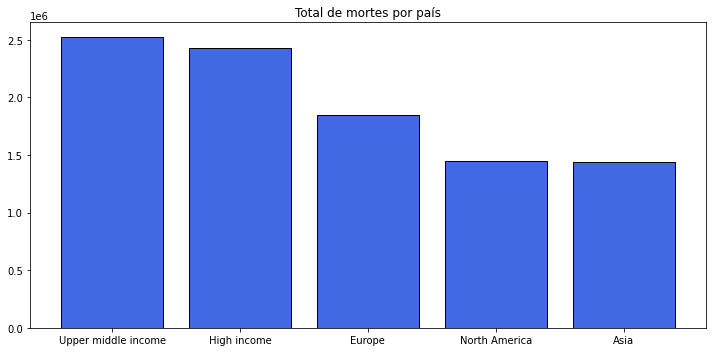

In [86]:
fig, ax = plt.subplots(figsize = (10,5))

top5_total_deaths = df.loc[df.date == '2022-06-09', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]
ax.bar('location', 'total_deaths', data=top5_total_deaths, color = "royalblue", edgecolor = "black", )
plt.title("Total de mortes por país")

plt.tight_layout();

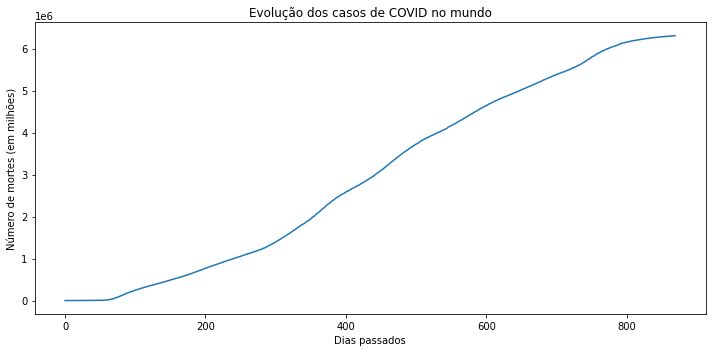

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))

df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(ax=ax)
ax.set_title("Evolução dos casos de COVID no mundo")
ax.set_ylabel("Número de mortes (em milhões)")
ax.set_xlabel("Dias passados")

plt.tight_layout();

Text(0.5, 1.0, 'PIB per capita e Total de Mortos')

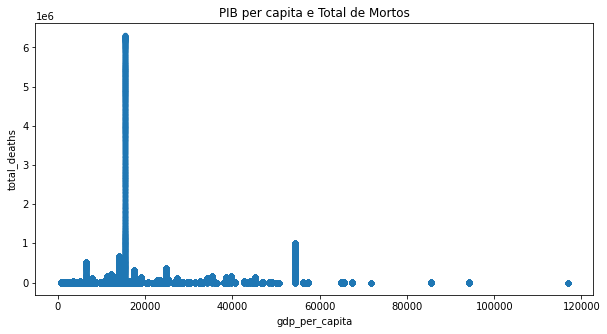

In [129]:
fig, ax = plt.subplots(figsize = (10, 5))

df.plot.scatter(x = "gdp_per_capita", y = "total_deaths", ax = ax)
ax.set_title("PIB per capita e Total de Mortos")

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*